In [1]:
import os
import pandas as pd
from pathlib import Path
from dateutil.parser import parse
from datetime import datetime


import matplotlib.pyplot as plt

from beardataset.bearid import parse_chips_xml

/tmp/ipykernel_259916/84951144.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_filepaths(root: Path, allowed_suffixes={".jpg", ".JPG"}) -> list[Path]:
    """Lists all filepaths given a root directory `root`."""
    return [p for p in root.rglob("*") if p.suffix in allowed_suffixes and p.exists()]

In [3]:
root_path_chips = Path("../../data/01_raw/BearID/chips/")
filepaths = get_filepaths(root_path_chips)
len(filepaths)

4669

In [4]:
base_path = Path("../../data/01_raw/BearID/")

label_train_filepath = base_path / "chips_train.xml"
label_val_filepath = base_path / "chips_val.xml"
label_test_filepath = base_path / "chips_test.xml"

data_train = parse_chips_xml(base_path=base_path, filepath=label_train_filepath)
data_val = parse_chips_xml(base_path=base_path, filepath=label_val_filepath)
data_test = parse_chips_xml(base_path=base_path, filepath=label_test_filepath)

In [5]:
data_test["chips"][0]

{'label': 'bf_755',
 'resolution': 6400,
 'filepath': PosixPath('../../data/01_raw/BearID/chips/brooksFalls/nps_library_201709/bf_755/755_073104_02_chip_0.jpg'),
 'source': PosixPath('../../data/01_raw/BearID/images/brooksFalls/nps_library_201709/bf_755/755_073104_02.jpg'),
 'box': {'label': 'bf_755',
  'top': 407,
  'left': 527,
  'width': 80,
  'height': 80,
  'parts': {'htop': {'x': 0, 'y': 0},
   'lear': {'x': 592, 'y': 415},
   'rear': {'x': 546, 'y': 417},
   'nose': {'x': 563, 'y': 461},
   'leye': {'x': 582, 'y': 431},
   'reye': {'x': 558, 'y': 431}}},
 'dimensions': {'width': 150, 'height': 150}}

In [6]:
data = [
    *[{'split': 'test', **d} for d in data_test["chips"]],
    *[{'split': 'val', **d} for d in data_val["chips"]],
    *[{'split': 'train', **d} for d in data_train["chips"]],
]

df = pd.DataFrame(data)
df.head()

,split,label,resolution,filepath,source,box,dimensions
0,test,bf_755,6400,../../data/01_raw/BearID/chips/brooksFalls/nps...,../../data/01_raw/BearID/images/brooksFalls/np...,"{'label': 'bf_755', 'top': 407, 'left': 527, '...","{'width': 150, 'height': 150}"
1,test,bf_755,80940,../../data/01_raw/BearID/chips/brooksFalls/fi_...,../../data/01_raw/BearID/images/brooksFalls/fi...,"{'label': 'bf_755', 'top': 421, 'left': 1073, ...","{'width': 150, 'height': 150}"
2,test,bf_755,56628,../../data/01_raw/BearID/chips/brooksFalls/bea...,../../data/01_raw/BearID/images/brooksFalls/be...,"{'label': 'bf_755', 'top': 359, 'left': 390, '...","{'width': 150, 'height': 150}"
3,test,bf_755,39204,../../data/01_raw/BearID/chips/brooksFalls/je_...,../../data/01_raw/BearID/images/brooksFalls/je...,"{'label': 'bf_755', 'top': 476, 'left': 598, '...","{'width': 150, 'height': 150}"
4,test,bf_755,6400,../../data/01_raw/BearID/chips/brooksFalls/nps...,../../data/01_raw/BearID/images/brooksFalls/np...,"{'label': 'bf_755', 'top': 295, 'left': 495, '...","{'width': 150, 'height': 150}"


In [7]:
def region(label: str) -> str:
    return label[:2]

def info(filepath: Path) -> str:
    return filepath.parent.parent.name

def date(filepath: Path):
    info = filepath.parent.parent.name.split("_")
    date_str = info[-1]
    origin = "_".join(info[:-1])

    if len(date_str) == 4:
         return datetime.strptime(date_str, "%Y")
    elif len(date_str) == 6:
        return datetime.strptime(date_str, "%Y%m")
    elif len(date_str) == 8:
        return datetime.strptime(date_str, "%Y%m%d")
    else:
        return None

In [8]:
# Preprocessing the dataframe 
df["region"] = df["label"].map(region)
df["info"] = df["filepath"].map(info)
# The best would be to get the metadata date from the image... It seems to be missing though
df["date"] = df["filepath"].map(date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   split       4669 non-null   object        
 1   label       4669 non-null   object        
 2   resolution  4669 non-null   int64         
 3   filepath    4669 non-null   object        
 4   source      4669 non-null   object        
 5   box         4669 non-null   object        
 6   dimensions  4669 non-null   object        
 7   region      4669 non-null   object        
 8   info        4669 non-null   object        
 9   date        4669 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 364.9+ KB


In [9]:
df.head()

,split,label,resolution,filepath,source,box,dimensions,region,info,date
0,test,bf_755,6400,../../data/01_raw/BearID/chips/brooksFalls/nps...,../../data/01_raw/BearID/images/brooksFalls/np...,"{'label': 'bf_755', 'top': 407, 'left': 527, '...","{'width': 150, 'height': 150}",bf,nps_library_201709,2017-09-01
1,test,bf_755,80940,../../data/01_raw/BearID/chips/brooksFalls/fi_...,../../data/01_raw/BearID/images/brooksFalls/fi...,"{'label': 'bf_755', 'top': 421, 'left': 1073, ...","{'width': 150, 'height': 150}",bf,fi_2015_2016,2016-01-01
2,test,bf_755,56628,../../data/01_raw/BearID/chips/brooksFalls/bea...,../../data/01_raw/BearID/images/brooksFalls/be...,"{'label': 'bf_755', 'top': 359, 'left': 390, '...","{'width': 150, 'height': 150}",bf,bear_mon_201607,2016-07-01
3,test,bf_755,39204,../../data/01_raw/BearID/chips/brooksFalls/je_...,../../data/01_raw/BearID/images/brooksFalls/je...,"{'label': 'bf_755', 'top': 476, 'left': 598, '...","{'width': 150, 'height': 150}",bf,je_201708,2017-08-01
4,test,bf_755,6400,../../data/01_raw/BearID/chips/brooksFalls/nps...,../../data/01_raw/BearID/images/brooksFalls/np...,"{'label': 'bf_755', 'top': 295, 'left': 495, '...","{'width': 150, 'height': 150}",bf,nps_library_201709,2017-09-01


In [10]:
df.groupby(["region"]).size().reset_index(name="counts").set_index("region")

,counts
region,
bc,1297
bf,3372


In [11]:
df.groupby(["info"]).size().reset_index(name="counts").set_index("info").sort_values("counts", ascending=False)

,counts
info,
melanie_20170828,1297
fa_2015_2016,840
ko_201709,453
bear_mon_201407,404
bear_mon_201507,330
bear_mon_201607,301
bear_mon_201509,213
bear_mon_201609,199
nps_library_201709,135


In [12]:
df.groupby(["info", "label"]).size().reset_index(name="counts").sort_values("counts", ascending=False)

,info,label,counts
222,fa_2015_2016,bf_775,174
213,fa_2015_2016,bf_480,115
320,melanie_20170828,bc_bella,83
317,melanie_20170828,bc_amber,81
290,ko_201709,bf_151,81
...,...,...,...
79,bear_mon_201409,bf_747,1
84,bear_mon_201409,bf_868,1
243,fi_2015_2016,bf_854,1
336,melanie_20170828,bc_freda,1


Many bear individuals are taken from the same `info` (year and photographer) - which could lead to dataleaks if they end up in different splits.

In [13]:
df.groupby(["info", "label"]).size().reset_index(name="counts").sort_values("label", ascending=False)

,info,label,counts
305,ko_201709,bf_879,21
148,bear_mon_201509,bf_879,2
85,bear_mon_201409,bf_879,2
377,misc_20170907,bf_879,6
200,bear_mon_201609,bf_879,9
...,...,...,...
319,melanie_20170828,bc_beatrice,50
318,melanie_20170828,bc_aurora,11
317,melanie_20170828,bc_amber,81
316,melanie_20170828,bc_also,23


Bears individuals are scattered across different info (photographers, years, etc)

<Axes: xlabel='region'>

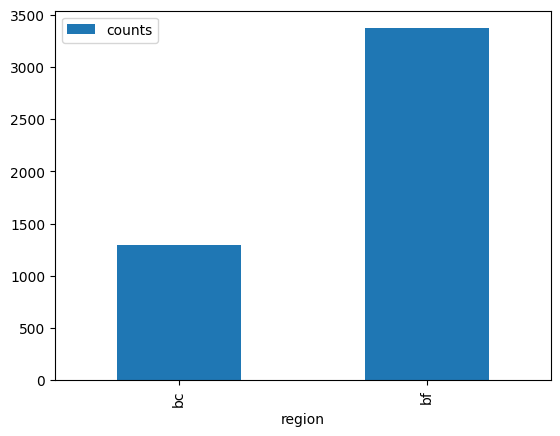

In [14]:
df.groupby(["region"]).size().reset_index(name="counts").set_index("region").plot.bar()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   split       4669 non-null   object        
 1   label       4669 non-null   object        
 2   resolution  4669 non-null   int64         
 3   filepath    4669 non-null   object        
 4   source      4669 non-null   object        
 5   box         4669 non-null   object        
 6   dimensions  4669 non-null   object        
 7   region      4669 non-null   object        
 8   info        4669 non-null   object        
 9   date        4669 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 364.9+ KB


## Individual counts

How many pictures do we have of a given bear individual? How does this distribution vary depending on the split (train, val, test)? How does it vary depending on the region (bc or bf)?

In [16]:
df.groupby(["label"]).size().reset_index(name='counts').set_index("label").sort_values("counts", ascending=False)

,counts
label,
bf_480,241
bf_775,226
bf_409,204
bf_410,191
bf_151,178
...,...
bc_pirate,1
bf_511,1
bf_039,1


In [17]:
def plot_individual_counts(df, title: str) -> None:
    df_individual_counts = df.groupby(["label"]).size().reset_index(name='counts')
    df_individual_counts["counts"].plot.hist(bins=25, figsize=(10,5), title=title)

### Data splits - all regions

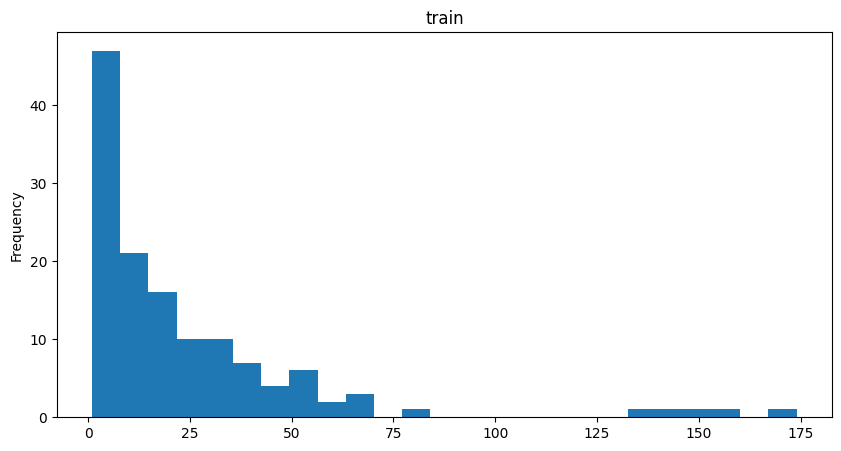

In [18]:
plot_individual_counts(df[df["split"] == "train"], title="train")

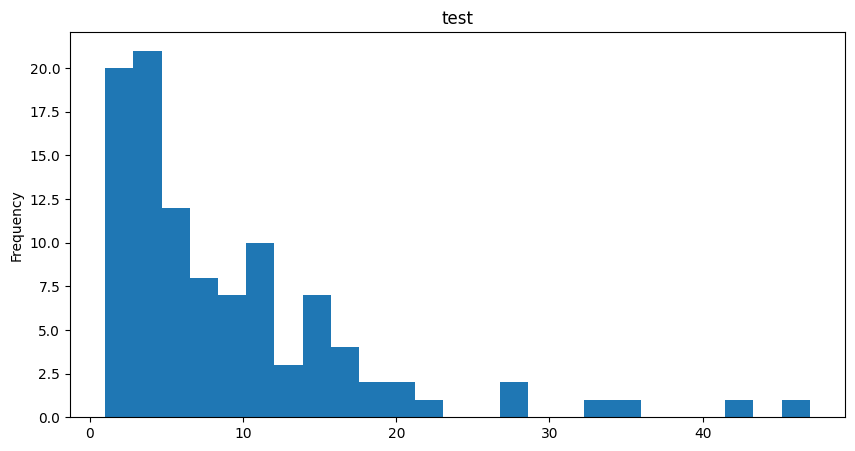

In [19]:
plot_individual_counts(df[df["split"] == "test"], title="test")

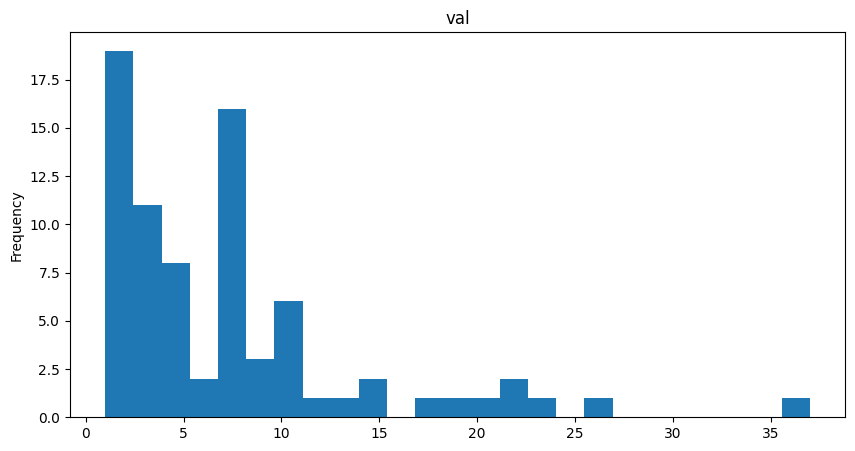

In [20]:
plot_individual_counts(df[df["split"] == "val"], title="val")

### Data splits - Per region

#### British Columbia - bc

In [21]:
df_bc = df[df["region"] == "bc"]
df_bc.head()

,split,label,resolution,filepath,source,box,dimensions,region,info,date
11,test,bc_santa,40000,../../data/01_raw/BearID/chips/britishColumbia...,../../data/01_raw/BearID/images/britishColumbi...,"{'label': 'bc_santa', 'top': 502, 'left': 646,...","{'width': 150, 'height': 150}",bc,melanie_20170828,2017-08-28
12,test,bc_santa,51529,../../data/01_raw/BearID/chips/britishColumbia...,../../data/01_raw/BearID/images/britishColumbi...,"{'label': 'bc_santa', 'top': 353, 'left': 644,...","{'width': 150, 'height': 150}",bc,melanie_20170828,2017-08-28
13,test,bc_santa,40000,../../data/01_raw/BearID/chips/britishColumbia...,../../data/01_raw/BearID/images/britishColumbi...,"{'label': 'bc_santa', 'top': 421, 'left': 646,...","{'width': 150, 'height': 150}",bc,melanie_20170828,2017-08-28
14,test,bc_toffee,191844,../../data/01_raw/BearID/chips/britishColumbia...,../../data/01_raw/BearID/images/britishColumbi...,"{'label': 'bc_toffee', 'top': 304, 'left': 509...","{'width': 150, 'height': 150}",bc,melanie_20170828,2017-08-28
15,test,bc_toffee,117986,../../data/01_raw/BearID/chips/britishColumbia...,../../data/01_raw/BearID/images/britishColumbi...,"{'label': 'bc_toffee', 'top': 372, 'left': 569...","{'width': 150, 'height': 150}",bc,melanie_20170828,2017-08-28


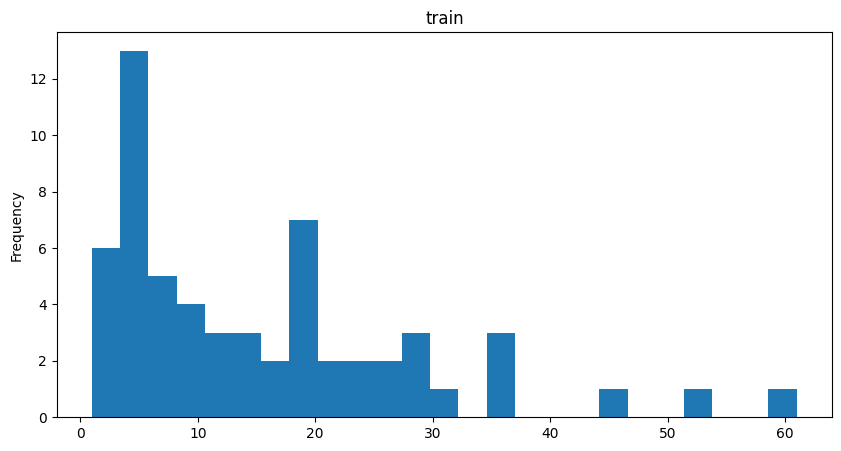

In [22]:
plot_individual_counts(df_bc[df_bc["split"] == "train"], title="train")

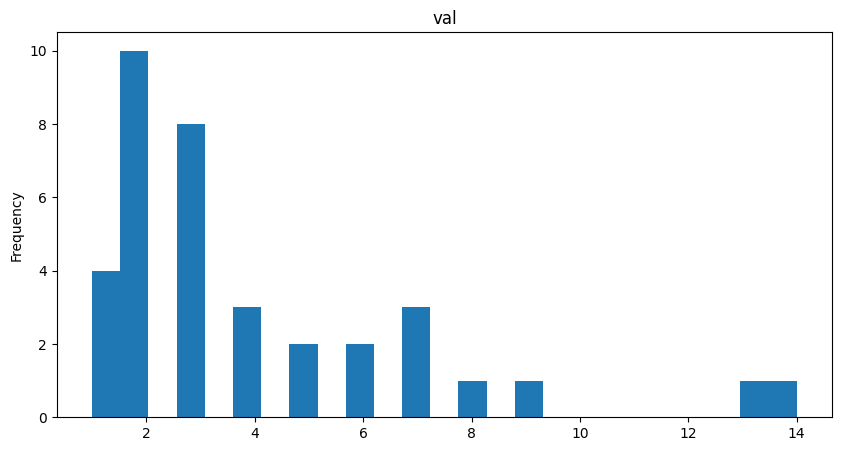

In [23]:
plot_individual_counts(df_bc[df_bc["split"] == "val"], title="val")

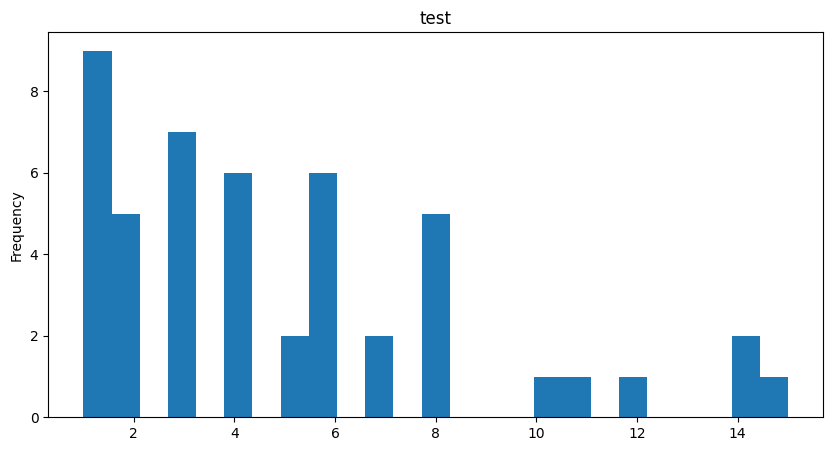

In [24]:
plot_individual_counts(df_bc[df_bc["split"] == "test"], title="test")

#### Brook Falls - bf

In [25]:
df_bf = df[df["region"] == "bf"]
df_bf.head()

,split,label,resolution,filepath,source,box,dimensions,region,info,date
0,test,bf_755,6400,../../data/01_raw/BearID/chips/brooksFalls/nps...,../../data/01_raw/BearID/images/brooksFalls/np...,"{'label': 'bf_755', 'top': 407, 'left': 527, '...","{'width': 150, 'height': 150}",bf,nps_library_201709,2017-09-01
1,test,bf_755,80940,../../data/01_raw/BearID/chips/brooksFalls/fi_...,../../data/01_raw/BearID/images/brooksFalls/fi...,"{'label': 'bf_755', 'top': 421, 'left': 1073, ...","{'width': 150, 'height': 150}",bf,fi_2015_2016,2016-01-01
2,test,bf_755,56628,../../data/01_raw/BearID/chips/brooksFalls/bea...,../../data/01_raw/BearID/images/brooksFalls/be...,"{'label': 'bf_755', 'top': 359, 'left': 390, '...","{'width': 150, 'height': 150}",bf,bear_mon_201607,2016-07-01
3,test,bf_755,39204,../../data/01_raw/BearID/chips/brooksFalls/je_...,../../data/01_raw/BearID/images/brooksFalls/je...,"{'label': 'bf_755', 'top': 476, 'left': 598, '...","{'width': 150, 'height': 150}",bf,je_201708,2017-08-01
4,test,bf_755,6400,../../data/01_raw/BearID/chips/brooksFalls/nps...,../../data/01_raw/BearID/images/brooksFalls/np...,"{'label': 'bf_755', 'top': 295, 'left': 495, '...","{'width': 150, 'height': 150}",bf,nps_library_201709,2017-09-01


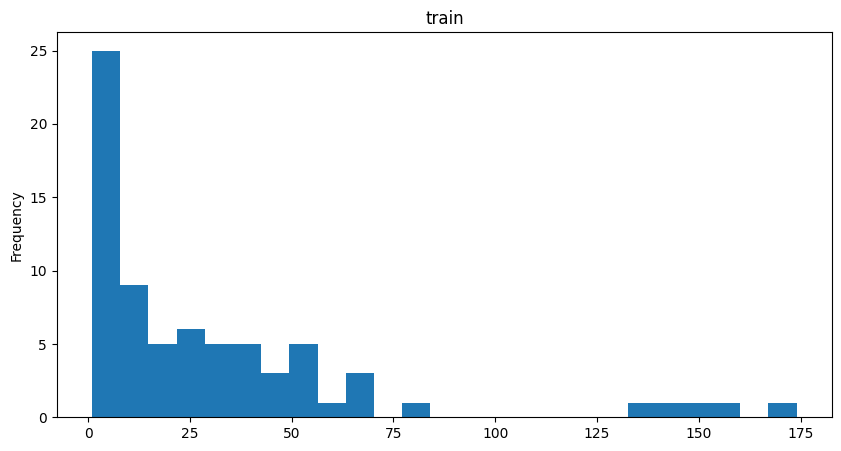

In [26]:
plot_individual_counts(df_bf[df_bf["split"] == "train"], title="train")

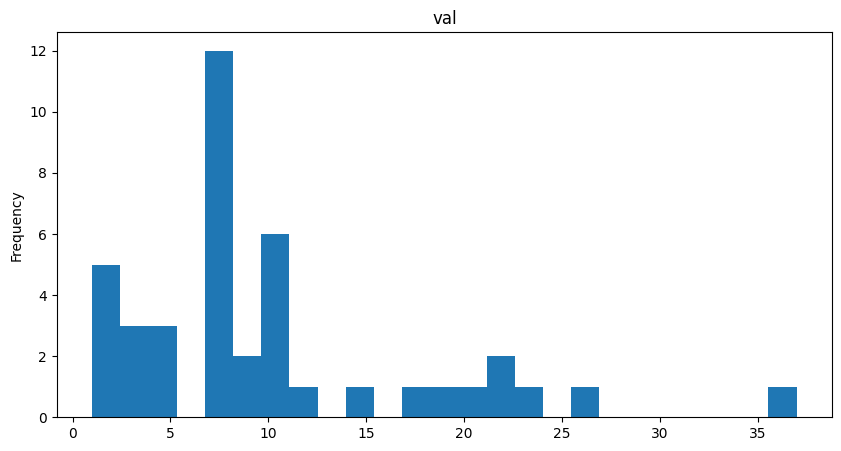

In [27]:
plot_individual_counts(df_bf[df_bf["split"] == "val"], title="val")

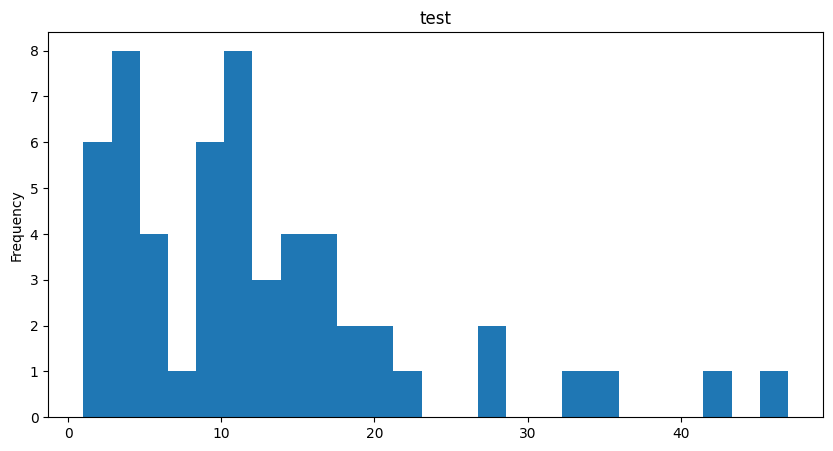

In [28]:
plot_individual_counts(df_bf[df_bf["split"] == "test"], title="test")